# Unit 3 - A Data Science campaign with pandas and PCA
This unit covers:
* Essential data wrangling with `pandas`;
* Working with different data types;
* Discerning categorical from numerical features;
* Spotting and interpreting the PCA 'variance bug';
* Working with a public data set.


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Essential Python tools and concepts – `pandas`

In this practical we will predominantly be working with the `pandas` library. 


In [45]:
import numpy as np
import pandas as pd

### Pandas Series

A Series is a one-dimensional list of values. 

Note the `NaN` value - it means "Not a Number". Originally this represents an undefined numerical, like the result of a division by zero. It is often used to denote missing values. 

In [87]:
values =[1, 3, 5, np.nan, 6, 8, 9] # a list of values
pd.Series(values)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
6    9.0
dtype: float64

It can have an index associated with each value. 

In [88]:
s = pd.Series(values, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
g    9.0
dtype: float64

####  Task
Add a letter to the index. What happens? How do you need to change the values list to fix the error?

### TASK SOLUTION
Adding letter g to the index gives us a value error, as the length of our values is 6 and uppon addition of g to our index, we have 7 indexes. The value error can be corrected by adding another value, so the total length of our values can be 7, which is the same with our index number. An illustration can be seen below

In [89]:
values =[1, 3, 5, np.nan, 6, 8, 9] # a list of values
pd.Series(values)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
6    9.0
dtype: float64

In [90]:
s = pd.Series(values, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
g    9.0
dtype: float64

### Pandas Data Frames
A **data frame** is like a two-dimensional series.

In [91]:
df = pd.DataFrame(np.random.randn(6,4)) # note the size: 6 rows, 4 columns
df

,0,1,2,3
0,1.411717,-0.676735,0.655473,0.034387
1,-0.275073,1.049221,-0.073753,-0.303195
2,-0.269537,1.015081,1.158539,-0.656868
3,0.595223,-0.140726,0.534262,-0.486533
4,-1.031814,-0.406213,-0.676394,-0.581066
5,-0.700551,-1.638642,0.511989,-0.033376


You can pass it an index during construction:

In [92]:
df = pd.DataFrame(np.random.randn(6,4), 
                  index=["row {}".format(i) for i in range(6)]) # note the size: 6 rows, 4 columns
df

,0,1,2,3
row 0,0.303489,-0.131519,-0.334824,-0.631834
row 1,1.234696,0.165045,-0.487547,-0.079932
row 2,-0.263469,-0.149497,-1.377470,0.583261
row 3,-0.226152,-1.525243,1.908717,-1.123895
row 4,-0.458694,0.622581,-1.408641,0.710811
row 5,-0.396953,0.687902,1.226004,-1.770255


Likewise, you can pass column names:

In [93]:
df = pd.DataFrame(np.random.randn(6,4), 
                  index=["row {}".format(i) for i in range(6)],
                  columns=['col {}'.format(i) for i in range(4)]) 
df

,col 0,col 1,col 2,col 3
row 0,0.526339,2.107880,0.018776,-0.295851
row 1,0.832456,0.718734,0.021398,-0.695728
row 2,-0.485220,1.378045,-0.313345,-1.619018
row 3,-1.400298,0.506032,-0.392996,-0.335806
row 4,0.469383,1.210309,0.049989,-1.012879
row 5,1.234871,0.082829,-0.007884,0.673127


You can also construct it from a dictionary:

In [94]:
columns = {'beep': np.random.randn(6),
           'bop': np.random.randn(6),
           'bup': np.random.randn(6),
           'bap': np.random.randn(6)}
df = pd.DataFrame(columns, index=["row {}".format(i) for i in range(6)])
df

,beep,bop,bup,bap
row 0,-0.038674,-0.568259,-0.347263,1.513373
row 1,1.031887,-0.714108,0.073467,0.417316
row 2,-0.046617,-0.126757,-0.490536,-1.270166
row 3,-0.206541,-0.182662,-0.645793,0.945267
row 4,0.725098,-0.478758,-0.483873,1.173563
row 5,0.677976,0.505059,1.715305,0.816435


### Data frame addressing
We can now address parts of the data by their row and column names. Columns are addressed like this:

In [95]:
df['bop']

row 0   -0.568259
row 1   -0.714108
row 2   -0.126757
row 3   -0.182662
row 4   -0.478758
row 5    0.505059
Name: bop, dtype: float64

Note that the return value type is a Series, not like a Data Frame! This is because it's one-dimensional.

Extract multiple columns at once by passing a list of column names. Does not need to be unique!

In [96]:
df[['bop', 'bap', 'bap']]

,bop,bap,bap
row 0,-0.568259,1.513373,1.513373
row 1,-0.714108,0.417316,0.417316
row 2,-0.126757,-1.270166,-1.270166
row 3,-0.182662,0.945267,0.945267
row 4,-0.478758,1.173563,1.173563
row 5,0.505059,0.816435,0.816435


Here, the return value is a DataFrame because it's two-dimensional.

Rows use the `.loc` attribute:

In [97]:
df.loc[['row 0', 'row 2']]

,beep,bop,bup,bap
row 0,-0.038674,-0.568259,-0.347263,1.513373
row 2,-0.046617,-0.126757,-0.490536,-1.270166


The `.iloc` attribute will allow you to specify the number of the row, instead of its label:

In [98]:
df.iloc[0]

beep   -0.038674
bop    -0.568259
bup    -0.347263
bap     1.513373
Name: row 0, dtype: float64

It can also use numpy-style addressing for the value matrix:

In [99]:
df.iloc[2,1:4]

bop   -0.126757
bup   -0.490536
bap   -1.270166
Name: row 2, dtype: float64

In [100]:
df.iloc[1:3,0:2]

,beep,bop
row 1,1.031887,-0.714108
row 2,-0.046617,-0.126757


### Advanced data frames

Pandas supports all kinds of data types. A data frame can hold all sorts of data types at the same time. This is the principal difference to a `numpy.array`, where all elements need to be of the same data type.

In [101]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The `info()` function gives you an overview of the data types:

In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 288.0+ bytes


This is all the `pandas` you'll need in this practical. Feel free to make yourself familiar with what else `pandas` has to offer. A good starting point is [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) in the official `pandas` documentation.

# Data campaign: Cars 
You now know (almost) all you need to know to start your first data science campaign. We will analyse the "cars" data set. It contains data on historic car models. You will be guided through the first steps, then it's up to you to apply PCA to explore the data. 

Let's load the data from the internet and make a data frame:

In [103]:
# use read_csv to read data from url 
# use set_index to set index 'model" 
# show dataframe.

cars = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
cars = cars.set_index('model')
cars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


### Descriptive statistics


Let's have a quick look at some descriptive statistics.

In [104]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [105]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

#### Task
What do you notice about the variance?

#### TASK SOLUTION
We can notice from the variance that: 
1. Features having a large variance indicates that number in the set are far from the mean, and far from each other. Examples of such features are disp, hp
2. Features that have a small variance indicates that the number in the set are close to the mean, and close to each other. Examples are mpg, cyl, drat, wt, qsec, and carb.
3. Features having a near 0 variance indicates that the number in the set are the closest to the mean and each other. Examples are gear, am, vs, wt and drat.

There's also a command that gives you a few common statistical descriptors, all in one data frame. Up to you to decide which you like better!

In [106]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Numerical vs. categorical features
**Numerical features** express a quantitative relationship between an instance and a feature. For example, 'height' is a numerical feature of a human. 

**Categorical features** express whether an instance belongs in a certain category. 'Male', 'female' are two categories that apply to humans (alongside others).

Most interesting data sets contain numerical **and** categorical features.

For PCA, only numerical features are useful (most of the time). 

These are the features of the cars dataset:
* mpg: Miles per (US) gallon
* cyl: Number of cylinders
* disp: Displacement (cubic inches)
* hp: Gross horsepower
* drat: Rear axle ratio
* wt: Weight (1000 lbs)
* qsec: 1/4 mile time
* vs: V-engine (0) or straight engine (1)
* am: Transmission (0 = automatic, 1 = manual)
* gear: Number of forward gears
* carb: Number of carburators


### **Task: remove categorical features** 
1. Decide which features are categorical, which are numerical. Search the internet if you don't know what a certain feature means.  
2. Delete categorical features from the data frame. Use the `.drop()` function. Documentation is available [online](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) or with the built-in documentation accessed by typing `pd.DataFrame.drop?` in a cell and executing it. 

### TASK SOLUTION
**The numerical features in our dataset are:** mpg (Miles per galon), cyl (cylinder), disp (displacement), hp (horse power), drat, wt, qsec, gear, carb.
**The categorical feature in our dataset is:** vs, and am.

#### Deleting our categorcial features which is our vs and am column

In [107]:
cars_new = cars.drop(columns=['vs', 'am'])
cars_new

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
model,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,4,2


In [108]:
cars_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   gear    32 non-null     int64  
 8   carb    32 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 2.5+ KB


In [109]:
cars_new.keys()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'gear', 'carb'], dtype='object')

### Task: Analyse the cleaned data set using PCA

1. Do a pca on the raw data.
2. Produce a scatter plot of the PCA'd data.
2. Produce a scree plot and analyse how much variance is captured in the first 2 components.
3. Plot the covariance matrix of the dataset. What stands out? 
3. Look at the components of the dataset. Which features are highly represented in the first two components?

### Task: Normalise and observe the effect (the *variance bug*)
1. Normalise the data to zero mean and unit variance and repeat the steps above. 
5. How does the scatter plot of the first two PCs compare to the PCA on the raw data before normalisation? 
6. What's the difference in the scree plot?
7. How is the covariance matrix different?
7. How do components differ? 
8. *(Advanced)* Spot a cluster in the plotted data, find the corresponding data points, figure out what they have in common.



## TASK SOLUTION

In [110]:
import sklearn.datasets as data
import pandas as pd
from sklearn.decomposition import PCA

In [111]:
cars.keys()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [112]:
from sklearn.preprocessing import StandardScaler
feature_names = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'gear', 'carb']
cars_new_values = cars_new.loc[:, feature_names].values
cars_new_values

array([[ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.62 ,  16.46 ,
          4.   ,   4.   ],
       [ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.875,  17.02 ,
          4.   ,   4.   ],
       [ 22.8  ,   4.   , 108.   ,  93.   ,   3.85 ,   2.32 ,  18.61 ,
          4.   ,   1.   ],
       [ 21.4  ,   6.   , 258.   , 110.   ,   3.08 ,   3.215,  19.44 ,
          3.   ,   1.   ],
       [ 18.7  ,   8.   , 360.   , 175.   ,   3.15 ,   3.44 ,  17.02 ,
          3.   ,   2.   ],
       [ 18.1  ,   6.   , 225.   , 105.   ,   2.76 ,   3.46 ,  20.22 ,
          3.   ,   1.   ],
       [ 14.3  ,   8.   , 360.   , 245.   ,   3.21 ,   3.57 ,  15.84 ,
          3.   ,   4.   ],
       [ 24.4  ,   4.   , 146.7  ,  62.   ,   3.69 ,   3.19 ,  20.   ,
          4.   ,   2.   ],
       [ 22.8  ,   4.   , 140.8  ,  95.   ,   3.92 ,   3.15 ,  22.9  ,
          4.   ,   2.   ],
       [ 19.2  ,   6.   , 167.6  , 123.   ,   3.92 ,   3.44 ,  18.3  ,
          4.   ,   4.   ],
       [ 17.8  ,   6

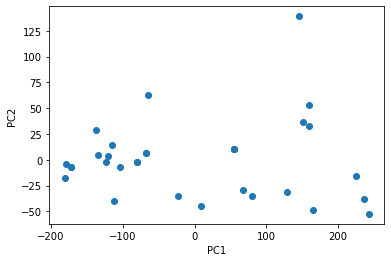

In [113]:
pca = PCA()
pca.fit(cars_new_values)
cars_new_pca = pca.transform(cars_new_values)

#plotting
ax = plt.gca()
ax.scatter(cars_new_pca[:,0], cars_new_pca[:,1])
t = ax.set_xlabel('PC1')
t = ax.set_ylabel('PC2')

[Text(0, 0, 'PC0'),
 Text(1, 0, 'PC1'),
 Text(2, 0, 'PC2'),
 Text(3, 0, 'PC3'),
 Text(4, 0, 'PC4'),
 Text(5, 0, 'PC5'),
 Text(6, 0, 'PC6'),
 Text(7, 0, 'PC7'),
 Text(8, 0, 'PC8')]

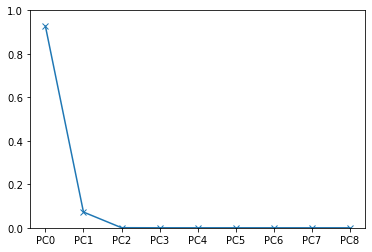

In [114]:
ax = plt.gca()
expl_var = pca.explained_variance_ratio_
ax.plot(expl_var, marker='x')
ax.set_ylim(0,1.0)
ax.set_xticks([0,1,2,3,4,5,6,7,8])
ax.set_xticklabels(["PC{}".format(i) for i in range(9)])

### NOTE AND SOLUTION FOR SCREE PLOT ANALYSIS

Our first two components are PC0 and PC1
The amount of variance captured in PC0 can be valued as 93.6%
    The amount of variance captured in PC1 can be valued as 6.4%

In [115]:
pca.get_covariance()

array([[ 3.63241028e+01, -9.17237903e+00, -6.33097208e+02,
        -3.20732056e+02,  2.19506351e+00, -5.11668468e+00,
         4.50914919e+00,  2.13568548e+00, -5.36310484e+00],
       [-9.17237903e+00,  3.18951613e+00,  1.99660282e+02,
         1.01931452e+02, -6.68366935e-01,  1.36737097e+00,
        -1.88685484e+00, -6.49193548e-01,  1.52016129e+00],
       [-6.33097208e+02,  1.99660282e+02,  1.53607998e+04,
         6.72115867e+03, -4.70640192e+01,  1.07684204e+02,
        -9.60516815e+01, -5.08026210e+01,  7.90687500e+01],
       [-3.20732056e+02,  1.01931452e+02,  6.72115867e+03,
         4.70086694e+03, -1.64511089e+01,  4.41926613e+01,
        -8.67700806e+01, -6.35887097e+00,  8.30362903e+01],
       [ 2.19506351e+00, -6.68366935e-01, -4.70640192e+01,
        -1.64511089e+01,  2.85881351e-01, -3.72720726e-01,
         8.71407258e-02,  2.75987903e-01, -7.84072581e-02],
       [-5.11668468e+00,  1.36737097e+00,  1.07684204e+02,
         4.41926613e+01, -3.72720726e-01,  9.573789

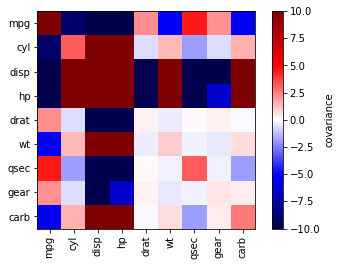

In [116]:
ax = plt.gca()
covmat = pca.get_covariance()
img = ax.imshow(covmat, cmap='seismic', vmin=-10, vmax=10) #expressing values in exponential context
plt.colorbar(img, label='covariance')
ax.set_yticks([0,1,2,3,4,5,6,7,8])
t = ax.set_yticklabels(cars_new[feature_names])
ax.set_xticks([0,1,2,3,4,5,6,7,8])
t = ax.set_xticklabels(cars_new[feature_names], rotation=90)

### NOTE AND SOLUTION FOR PLOTTING COVARIANCE MATRIX

1. From proper visualization of our covariance matrix plot, we can clearly see that their is a near zero correlation between numerical features such as drat, wt, qsec, gear and carb.

2. Looking at the compomnents of the datasets, the features that are highly represented in the first two components are mpg, disp, and hp.

## TASK SOLUTION FOR NORMALIZED DATA

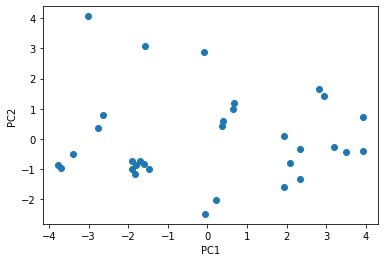

In [117]:
from sklearn import preprocessing as pp
ss = pp.StandardScaler()
ss.fit(cars_new_values)
pca_norm = PCA()
pca_norm.fit(ss.transform(cars_new_values)) 
cars_new_pca_norm = pca_norm.transform(ss.transform(cars_new_values))

#plotting
ax = plt.gca()
ax.scatter(cars_new_pca_norm[:,0], cars_new_pca_norm[:,1])
t = ax.set_xlabel('PC1')
t = ax.set_ylabel('PC2')

### NOTE ON COMPARISON OF THE SCATTER PLOT OF PCA BEFORE NORMALIZATION

Having compared the scatter plot obtained before and after normalization, we can clearly see that their is neither any trend nor correlation between PC1 and PC2. However we can notice there is a great difference in scaling between the two scatterplots. The scatterplot before normalization has a greater scaling value compared to that of the scatterplot obtained after normalization.

[Text(0, 0, 'PC0'),
 Text(1, 0, 'PC1'),
 Text(2, 0, 'PC2'),
 Text(3, 0, 'PC3'),
 Text(4, 0, 'PC4'),
 Text(5, 0, 'PC5'),
 Text(6, 0, 'PC6'),
 Text(7, 0, 'PC7'),
 Text(8, 0, 'PC8')]

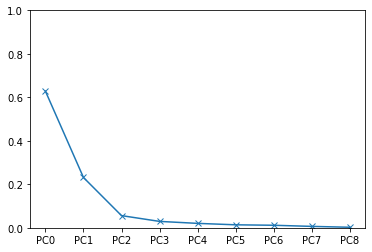

In [118]:
ax = plt.gca()
expl_var = pca_norm.explained_variance_ratio_
ax.plot(expl_var, marker='x')
ax.set_ylim(0,1.0)
ax.set_xticks([0,1,2,3,4,5,6,7,8])
ax.set_xticklabels(["PC{}".format(i) for i in range(9)])

### NOTE ON COMPARISON OF THE SCREE PLOT BEFORE AND AFTER NORMALIZATION

Comparing the scree plot before normalization, we can clearly see that the component **above the scree or elbow of the scree plot is PC0, this implies that the only component that can be retained for the scree plot before normalization is PC0**, while the scree plot after normalization shows that the **components above the scree or elbow are PCO and PC1, this implies that the only component that can be retained after normalization is PCO and PC1.**
1. Only PC0 can be retained from the scree plot before normalization.
2. PC0 and PC1 can be retained from the scree plot after normalization.

In [119]:
pca_norm.get_covariance()

array([[ 1.03225806, -0.87965105, -0.87489175, -0.80120606,  0.7031452 ,
        -0.89564839,  0.43218997,  0.49577781, -0.56869685],
       [-0.87965105,  1.03225806,  0.93113071,  0.8593006 , -0.72251676,
         0.80773759, -0.6103144 , -0.50857972,  0.54398792],
       [-0.87489175,  0.93113071,  1.03225806,  0.81646306, -0.73312405,
         0.91662444, -0.44768814, -0.57349079,  0.40771805],
       [-0.80120606,  0.8593006 ,  0.81646306,  1.03225806, -0.46323522,
         0.67999782, -0.7310693 , -0.12975923,  0.77399997],
       [ 0.7031452 , -0.72251676, -0.73312405, -0.46323522,  1.03225806,
        -0.7354226 ,  0.09414685,  0.7221782 , -0.0937185 ],
       [-0.89564839,  0.80773759,  0.91662444,  0.67999782, -0.7354226 ,
         1.03225806, -0.18035187, -0.60210271,  0.44139968],
       [ 0.43218997, -0.6103144 , -0.44768814, -0.7310693 ,  0.09414685,
        -0.18035187,  1.03225806, -0.21954295, -0.67741856],
       [ 0.49577781, -0.50857972, -0.57349079, -0.12975923,  0

### NOTE ON HOW THE COVARIANCE MATRIX IS DIFFERENT
Their is a great difference in the comparison of covariance matrix before normalization and after normalization. We can clearly see that the highest value of our covariance matrix before normalization was 6.72e+03, and the lowest value was -7.84e-02, while the highest value of our covariance matrix after normalization is 1.03, and the lowest value is -0.18.

### NOTE ON CHOW THE COMPONENTS DIFFER
1. PCA results over emphasizes results with large variance.
2. Covariance matrix is screwed when features are differently scaled.
3. Variance bug can lead to artificial inflation of feature importance.
4. Variance bug can also lead to misinterpretation of data.

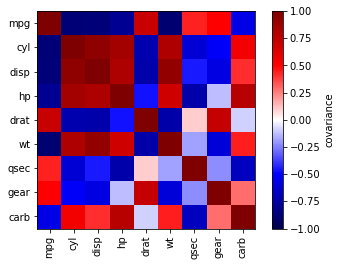

In [120]:
ax = plt.gca()
covmat = pca_norm.get_covariance()
img = ax.imshow(covmat, cmap='seismic', vmin=-1.0, vmax=1.0)
plt.colorbar(img, label='covariance')
ax.set_yticks([0,1,2,3,4,5,6,7,8])
t = ax.set_yticklabels(cars_new[feature_names])
ax.set_xticks([0,1,2,3,4,5,6,7,8])
t = ax.set_xticklabels(cars_new[feature_names], rotation=90)

# Coronavirus epidemic dynamics

Here's a task for advanced students. As you all are aware, last spring we saw the outbreak of Covid-19, aka coronavirus. Here, we're going to analyse a dataset from the beginning of the outbreak, when it was just about to spread around the world. 

### Task: Explore data on kaggle.com
1. Go to the website on the kaggle site: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset 
2. Inspect the data on the website and the various ways the site lets you explore it. Registration on the website is not necessary.



## Working with the Coronavirus outbreak data
1. The coronavirus dataset is provided on canvas. Download and save it in the same folder as this notebook.
2. Unzip the data.
3. Verify that the folder in which this notebook resides should now contain a sub-folder named `novel-corona-virus-2019-dataset`

First we load the main dataset into a DataFrame:

In [121]:
df = pd.read_csv('novel-corona-virus-2019-dataset/2019_nCoV_data.csv')
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0


If this fails then please check again whether the dataset folder is unzipped and resides in the same folder as this notebook. Check that the filename in the command matches the filename of the data set on disk.

The `Sno` column contains the serial number and is identical with the aut-generated index column. let's set the Index to track the `Sno` column:

In [122]:
df = df.set_index('Sno')
df 

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
Sno,,,,,,,
1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0


Let's explore the data types.

### Task: 
Which features are numeric? Which are continuous? Which are categorical?

### Task answer
The features that are numeric in our dataset are: Confirmed, deaths and recovered.
The features that are continUous in our dataset are: Date, and last update.
The features that are categorical are province/state, and country.

## Initial exploration
Let's plot the number of number of confirmed cases for the whole data set.

<AxesSubplot:xlabel='Sno'>

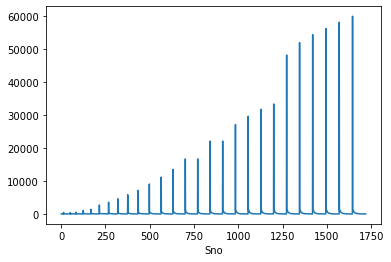

In [123]:
df['Confirmed'].plot()

### Task

Is this the plot you expected? Why not? 

Solution: The above command naively plots the whole column, but ignores the structure of the data set, where each line applies to a different province/state, or even country.

We need to filter by country! Let's look only at the Hubei province, the root of the outbreak:

In [124]:
df.loc[df['Province/State'] == 'Hubei']

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
Sno,,,,,,,
14,01/22/2020 12:00:00,Hubei,China,01/22/2020 12:00:00,444.0,0.0,0.0
52,01/23/2020 12:00:00,Hubei,Mainland China,01/23/2020 12:00:00,444.0,17.0,28.0
84,01/24/2020 12:00:00,Hubei,Mainland China,01/24/2020 12:00:00,549.0,24.0,31.0
125,01/25/2020 22:00:00,Hubei,Mainland China,01/25/2020 22:00:00,1052.0,52.0,42.0
169,01/26/2020 23:00:00,Hubei,Mainland China,01/26/2020 23:00:00,1423.0,76.0,44.0
216,01/27/2020 20:30:00,Hubei,Mainland China,01/27/2020 20:30:00,2714.0,100.0,47.0
268,01/28/2020 23:00:00,Hubei,Mainland China,01/28/2020 23:00:00,3554.0,125.0,80.0
320,01/29/2020 21:00:00,Hubei,Mainland China,01/29/2020 21:00:00,4586.0,162.0,90.0
376,01/30/2020 21:30:00,Hubei,Mainland China,01/30/2020 21:30:00,5806.0,204.0,116.0


That looks better! Let's plot those values:

<AxesSubplot:xlabel='Sno'>

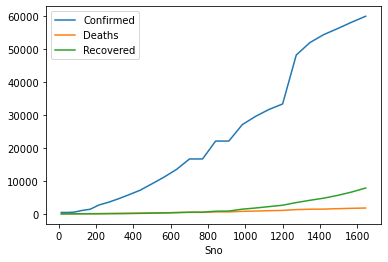

In [125]:
df.loc[df['Province/State'] == 'Hubei'].plot()

Note how the `.plot()` function of the `DataFrame` object already gives us a plot of all numerical features, complete with a legend!

The plot is still lackiong though; It needs for example:
* Dates on the x-axis
* proper labels on the y-axis

### Task (advanced)
* Read the documentation of the `DataFrame.plot` command to learn how to make it plot the date on the x-axis.
* use the `ax = gca()` method the get an axis object, and call the `set_ylabel()` method to set an appropriate y-label.

### Task (advanced)
* Plot the data for all of China.
* Aggregate the data for the rest of the world and plot it.

### TASK SOLUTION

In [126]:
df.loc[df['Country'] == 'China']

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
Sno,,,,,,,
1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0


<AxesSubplot:xlabel='Sno'>

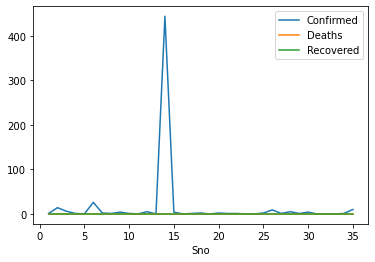

In [127]:
df.loc[df['Country'] == 'China'].plot()

## That's it for today!
We have covered have learnt:
* Essential `pandas`; how to create, address and modify `pandas` `DataFrame`s.
* How to perform a data science campaign using PCA.
* Initial loading and ploting of time-series data.

Next week we'll continue our analysis of the coronavirus data, with a special focus on visualisation.